## USA Housing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
housing = pd.read_csv('Housing - Housing.csv')

## EXPLORING THE DATASET

In [3]:
housing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                State Neighbourhood Code  
0      Laurabury, NE                  NE  
1  Lake Kathleen, CA                  CA  
2     Danieltown, WI                  WI  
3              FPO AP                 AP  
4              FPO AE                 AE

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   State                         5000 non-null   object 
 7   Neighbourhood Code            5000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


In [5]:
# getting the column names
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'State',
       'Neighbourhood Code'],
      dtype='object')

In [6]:
# viewing the number of null values in each column of the datset
housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
State                           0
Neighbourhood Code              0
dtype: int64

In [7]:
# checking for duplicate rows
housing[housing.duplicated()]

Empty DataFrame
Columns: [Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population, Price, State, Neighbourhood Code]
Index: []

In [8]:
 housing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928700  9.975771e+05  
50%                        4.050000     36199.406690  1.232669e+06  
75%                        4.490000     42861.290770  1.471210e+06  
max                        6.500000     69621.713380  2.469066e+06

## CLEANING THE DATA

In [9]:
# getting the new column names
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'State',
       'Neighbourhood Code'],
      dtype='object')

In [10]:
# changing the column names
housing.columns = ['AA_income', 'AA_house_age', 'AA_no_of_rooms',
       'AA_no_of_bedrooms', 'A_pop', 'price', 'state',
       'nhood_code']

In [11]:
housing.head(15)

AA_income  AA_house_age  AA_no_of_rooms  AA_no_of_bedrooms        A_pop  \
0   79545.45857      5.682861        7.009188               4.09  23086.80050   
1   79248.64245      6.002900        6.730821               3.09  40173.07217   
2   61287.06718      5.865890        8.512727               5.13  36882.15940   
3   63345.24005      7.188236        5.586729               3.26  34310.24283   
4   59982.19723      5.040555        7.839388               4.23  26354.10947   
5   80175.75416      4.988408        6.104512               4.04  26748.42842   
6   64698.46343      6.025336        8.147760               3.41  60828.24909   
7   78394.33928      6.989780        6.620478               2.42  36516.35897   
8   59927.66081      5.362126        6.393121               2.30  29387.39600   
9   81885.92718      4.423672        8.167688               6.10  40149.96575   
10  80527.47208      8.093513        5.042747               4.10  47224.35984   
11  50593.69550      4.496513        7.467627               4.49  34343.99189   
12  39033.80924      7.671755        7.250029               3.10  39220.36147   
13  73163.66344      6.919535        5.993188               2.27  32326.12314   
14  69391.38018      5.344776        8.406418               4.37  35521.29403   

           price               state nhood_code  
0   1.059034e+06      Laurabury, NE          NE  
1   1.505891e+06  Lake Kathleen, CA          CA  
2   1.058988e+06     Danieltown, WI          WI  
3   1.260617e+06              FPO AP         AP  
4   6.309435e+05              FPO AE         AE  
5   1.068138e+06      Tracyport, KS          KS  
6   1.502056e+06    Nguyenburgh, CO          CO  
7   1.573937e+06   Lake William, TN          TN  
8   7.988695e+05              FPO AA         AA  
9   1.545155e+06              DPO AE         AE  
10  1.707046e+06      Janetbury, NM          NM  
11  6.637324e+05   Davisborough, PW          PW  
12  1.042814e+06    Huffmanland, NE          NE  
13  1.291332e+06     North John, AR          AR  
14  1.402818e+06              APO AP         AP

In [12]:
# checking the percentage frequency distribution of 'nhood_code' column
print(housing['nhood_code'].value_counts(normalize = True) *100)
housing['nhood_code'].value_counts()

AA    3.54
AP    3.40
AE    3.34
GU    1.82
OR    1.82
      ... 
WI    1.34
AK    1.34
IL    1.28
MD    1.24
VI    1.10
Name: nhood_code, Length: 62, dtype: float64


AA    177
AP    170
AE    167
GU     91
OR     91
     ... 
WI     67
AK     67
IL     64
MD     62
VI     55
Name: nhood_code, Length: 62, dtype: int64

In [13]:
# no of unique items in the 'nhood_code' column
housing['nhood_code'].nunique()

62

In [14]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [15]:
ProfileReport(housing)

In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AA_income          5000 non-null   float64
 1   AA_house_age       5000 non-null   float64
 2   AA_no_of_rooms     5000 non-null   float64
 3   AA_no_of_bedrooms  5000 non-null   float64
 4   A_pop              5000 non-null   float64
 5   price              5000 non-null   float64
 6   state              5000 non-null   object 
 7   nhood_code         5000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


In [18]:
print(housing[housing['nhood_code'] == 'TN'].value_counts().sum())

housing[housing['nhood_code'] == 'TX'].value_counts().sum()

77


78

In [19]:
# What kind of houses will you suggest to be built in these neighborhood TN
tn= housing[(housing['nhood_code'] == 'TN')]
tn

AA_income  AA_house_age  AA_no_of_rooms  AA_no_of_bedrooms  \
7     78394.33928      6.989780        6.620478               2.42   
22    64490.65027      4.210323        5.478088               4.31   
228   66574.70999      5.550265        6.844150               2.17   
245   77300.03144      5.260975        6.936548               4.49   
293   60316.79073      4.308730        5.564353               4.12   
...           ...           ...             ...                ...   
4611  74280.69960      7.171106        5.652291               4.16   
4700  55573.61779      7.036672        4.946875               4.02   
4705  57084.30102      7.255851        7.577656               3.46   
4791  67367.20560      5.462485        7.553615               4.34   
4958  81090.48414      5.272441        6.723929               3.09   

            A_pop         price                    state nhood_code  
7     36516.35897  1.573937e+06        Lake William, TN          TN  
22    40358.96011  7.188872e+05           Port Sara, TN          TN  
228   69575.44946  1.702406e+06      West Stephanie, TN          TN  
245   29499.04095  1.118048e+06   South Amandahaven, TN          TN  
293   33831.89363  6.953863e+05          Mariemouth, TN          TN  
...           ...           ...                      ...        ...  
4611  26115.26041  1.324470e+06        Johnsonmouth, TN          TN  
4700  29352.86297  9.192070e+05       Andersonville, TN          TN  
4705  55851.84719  1.524968e+06        New Michelle, TN          TN  
4791  33098.38650  1.094574e+06         Lake Joseph, TN          TN  
4958  30433.80832  1.189981e+06  North Juliachester, TN          TN  

[77 rows x 8 columns]

In [20]:
tn.describe()

AA_income  AA_house_age  AA_no_of_rooms  AA_no_of_bedrooms  \
count     77.000000     77.000000       77.000000          77.000000   
mean   67026.557231      6.090132        6.792783           3.774805   
std     9907.060790      0.912961        0.963757           1.168527   
min    48510.910130      3.573485        4.147431           2.050000   
25%    60316.790730      5.462485        6.091906           3.100000   
50%    66197.491290      6.208899        6.844150           3.490000   
75%    74405.372570      6.772487        7.509012           4.360000   
max    94670.045920      8.641821        8.859651           6.450000   

              A_pop         price  
count     77.000000  7.700000e+01  
mean   38527.061212  1.239269e+06  
std     9751.222873  3.571528e+05  
min    15065.046610  1.515271e+05  
25%    31568.101490  9.957216e+05  
50%    38418.058300  1.208875e+06  
75%    45358.639270  1.472887e+06  
max    69575.449460  2.186195e+06

houses with 6-7 no of rooms with 3-4 bedrooms can be built in TN neighborhood

In [21]:
# What kind of houses will you suggest to be built in these neighborhood TX

tx= housing[(housing['nhood_code'] == 'TX')]
tx

AA_income  AA_house_age  AA_no_of_rooms  AA_no_of_bedrooms  \
87    74579.98953      4.639654        5.521489               3.07   
154   79412.83547      6.087360        7.481321               3.26   
178   78379.41224      5.985697        5.681834               3.20   
284   75984.83111      6.725721        7.887776               4.31   
286   69017.18280      5.777106        5.783613               3.11   
...           ...           ...             ...                ...   
4812  61297.34624      5.605703        6.633719               4.31   
4815  77168.99346      6.214932        7.369870               6.30   
4861  61197.96685      5.577860        7.393212               3.46   
4901  65706.75564      6.180694        5.698131               4.31   
4929  81137.46297      7.726796        6.791657               3.21   

            A_pop         price                      state nhood_code  
87    42806.14664  1.173474e+06            Pattonside, TX          TX  
154   17568.73376  1.383031e+06     North Audreymouth, TX          TX  
178   31357.38821  1.159842e+06  North Christianhaven, TX          TX  
284   42248.68586  1.754771e+06        Melissaborough, TX          TX  
286   55830.75284  1.446757e+06           Tranchester, TX          TX  
...           ...           ...                        ...        ...  
4812  26656.95172  7.853991e+05          Meadowsmouth, TX          TX  
4815  28109.08757  1.328586e+06            Kevinhaven, TX          TX  
4861  35551.38521  1.032043e+06    West Victorchester, TX          TX  
4901  42527.78566  1.271340e+06            Arnoldfort, TX          TX  
4929  34493.74717  1.659171e+06         Hernandezfort, TX          TX  

[78 rows x 8 columns]

In [22]:
tx.describe()

AA_income  AA_house_age  AA_no_of_rooms  AA_no_of_bedrooms  \
count     78.000000     78.000000       78.000000          78.000000   
mean   71856.616708      6.215495        6.887704           3.772564   
std    11163.610833      1.054627        1.011935           1.184574   
min    43952.336210      4.152153        4.087718           2.010000   
25%    63382.968912      5.660472        6.210418           3.077500   
50%    71845.211090      6.108724        6.853312           3.435000   
75%    79845.748843      6.957149        7.494144           4.347500   
max    94902.237220      8.381096        9.921520           6.400000   

              A_pop         price  
count     78.000000  7.800000e+01  
mean   36172.034449  1.336076e+06  
std    10268.197326  3.676799e+05  
min    12513.681730  3.023074e+05  
25%    28327.943230  1.146659e+06  
50%    35163.464650  1.321004e+06  
75%    42736.556395  1.527992e+06  
max    62963.755390  2.197437e+06

houses with 6-7 no of rooms with 3-4 bedrooms can be built in TX neighborhood

In [28]:
housing.select_dtypes(exclude=['object'])

AA_income  AA_house_age  AA_no_of_rooms  AA_no_of_bedrooms  \
0     79545.45857      5.682861        7.009188               4.09   
1     79248.64245      6.002900        6.730821               3.09   
2     61287.06718      5.865890        8.512727               5.13   
3     63345.24005      7.188236        5.586729               3.26   
4     59982.19723      5.040555        7.839388               4.23   
...           ...           ...             ...                ...   
4995  60567.94414      7.830362        6.137356               3.46   
4996  78491.27543      6.999135        6.576763               4.02   
4997  63390.68689      7.250591        4.805081               2.13   
4998  68001.33124      5.534388        7.130144               5.44   
4999  65510.58180      5.992305        6.792336               4.07   

            A_pop         price  
0     23086.80050  1.059034e+06  
1     40173.07217  1.505891e+06  
2     36882.15940  1.058988e+06  
3     34310.24283  1.260617e+06  
4     26354.10947  6.309435e+05  
...           ...           ...  
4995  22837.36103  1.060194e+06  
4996  25616.11549  1.482618e+06  
4997  33266.14549  1.030730e+06  
4998  42625.62016  1.198657e+06  
4999  46501.28380  1.298950e+06  

[5000 rows x 6 columns]

Text(0.5, 1.0, 'The numerical relationship between columns in the housing dataset')

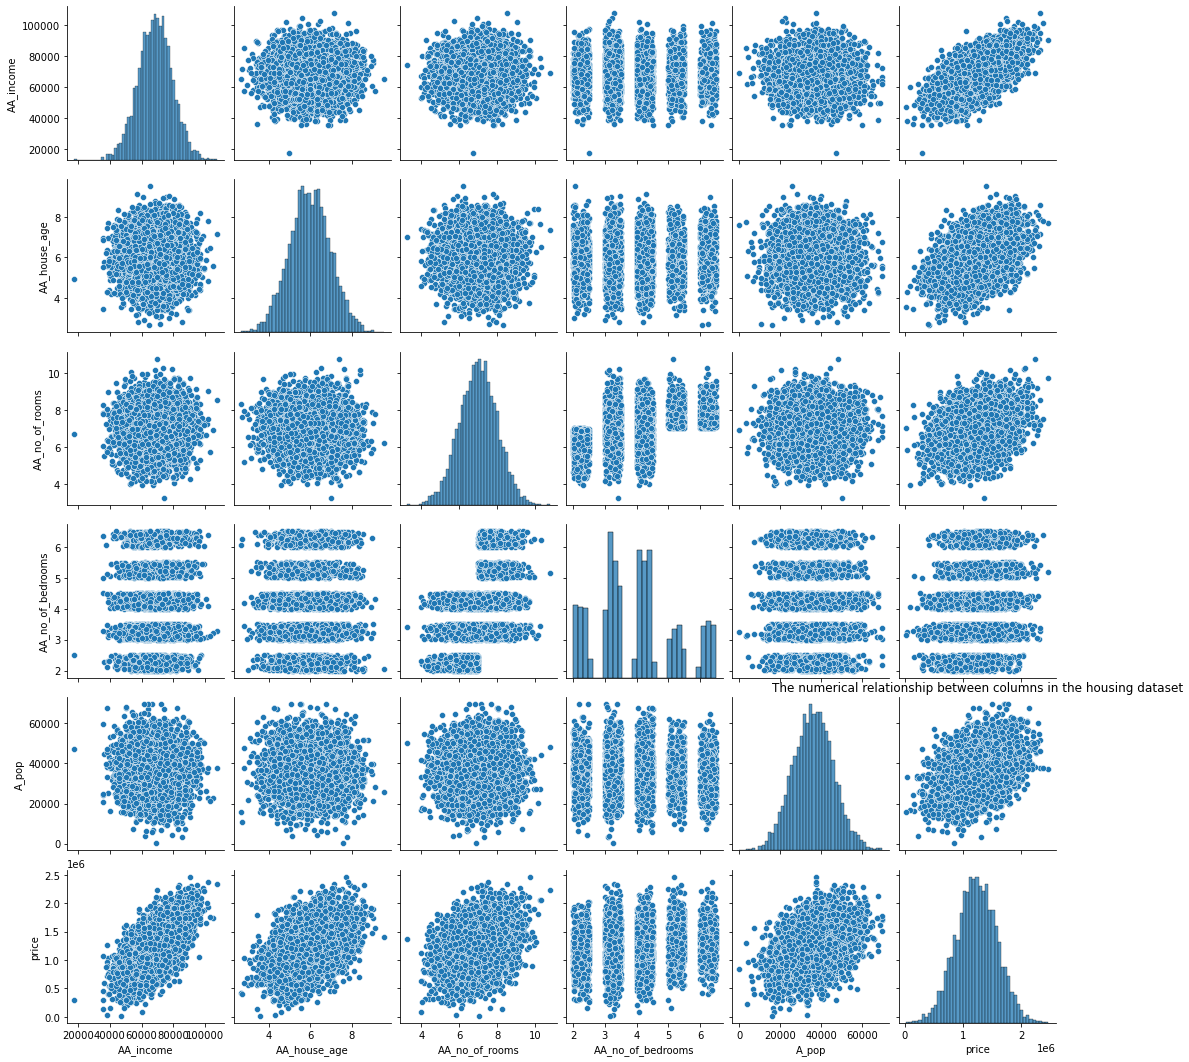

In [29]:
# this creates a metrics that contains the plot of every numerical columns against one another
sns.pairplot(housing)
plt.title('The numerical relationship between columns in the housing dataset')

In [30]:
# correlation of each columns with price as seen in the pairplot
housing.corr()['price'].sort_values(ascending= False)

price                1.000000
AA_income            0.639734
AA_house_age         0.452543
A_pop                0.408556
AA_no_of_rooms       0.335664
AA_no_of_bedrooms    0.171071
Name: price, dtype: float64

C:\Users\OLAYINKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

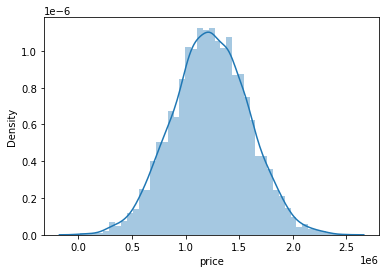

In [31]:
# shows the distribution of the column to be predicted; this is a normal distribution
sns.distplot(housing['price'])

C:\Users\OLAYINKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

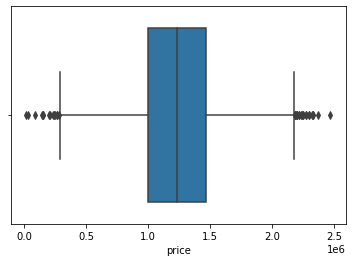

In [32]:
# checking for outliers
sns.boxplot(housing['price'])

In [33]:
upper = housing['price'].quantile(0.75) # calculating the 75th percentile
lower = housing['price'].quantile(0.25) # calculating the 25th percentile
IQR = upper-lower # calculating the interquartile range

upper + IQR * 1.5
lower - IQR * 1.5

housing['price'][(housing['price'] >=lower - IQR * 1.5) & (housing['price'] <= upper + IQR * 1.5)]
# the rows in the price column that are not outliers

# housing['price'][(housing['price'] <=lower - IQR * 1.5) & (housing['price'] <= upper + IQR * 1.5)]
# the rows in the price column that are outliers

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: price, Length: 4965, dtype: float64

Text(0.5, 1.0, 'correlation between the columns in the housing dataset')

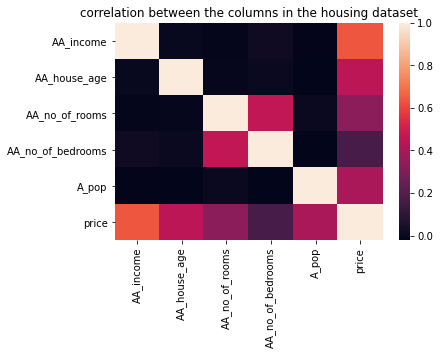

In [34]:
# heatmap of the correlation between the columns
# this is the same as the pairplot
sns.heatmap(housing.corr())
plt.title('correlation between the columns in the housing dataset')

# mask = np.triu(housing.corr()) # this cuts-off the upper, duplicate part of the heatmap
                                # tril cuts-off the lower, duplicate part of the heatmap
# sns.heatmap(housing.corr(), mask= mask)
# plt.title('correlation between the columns in the housing dataset')


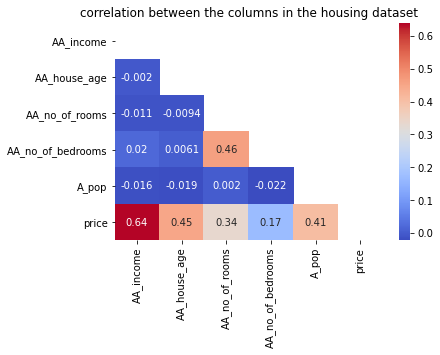

In [35]:
# heatmap of the correlation between the columns and their respective value
mask= np.triu(housing.corr())
sns.heatmap(housing.corr(), annot = True, cmap='coolwarm', mask = mask)
plt.title('correlation between the columns in the housing dataset');

## Training a Linear Regression Model
first we will need to split up our data into an x array that contains the features to train on, and a y array with the target variable, in this case the price column. We will toss out the address column because it only has text info that the linear regression model can't use.

### x and y arrays

In [44]:
x = housing[['AA_income', 'AA_house_age', 'AA_no_of_rooms', 'AA_no_of_bedrooms',
       'A_pop']] # independent variables/features are classified as x
y = housing['price'] # Target variable that we are trying to predict are classified as y

In [45]:
housing.columns

Index(['AA_income', 'AA_house_age', 'AA_no_of_rooms', 'AA_no_of_bedrooms',
       'A_pop', 'price', 'state', 'nhood_code'],
      dtype='object')

### Train Test Split
now lets split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state =101)
# this is like using tuple unpacking to grab training set and testing set with test size as the % 
# of the dataset you want to be allocated. in this case we are allocating 0.4 which is 40% and 
# random state 101 ensures yours and mine are splitted the same

## Creating and Training the Model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lrm = LinearRegression()
# here we instantiate by creating an instance of the linear regression model basicly creating a 
# linear regression object

In [51]:
lrm.fit(x_train, y_train)

LinearRegression()

## Model Evaluation
evaluating the model by checking out its coefficients and how we can interpret them

In [52]:
# print the intercept
print(lrm.intercept_) # the intercept is the a in the linearRegression formula

-2640159.796813773


In [53]:
lrm.coef_ # coefficients for each feature / independent variable

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [54]:
x_train.columns # the columns in the x_train

Index(['AA_income', 'AA_house_age', 'AA_no_of_rooms', 'AA_no_of_bedrooms',
       'A_pop'],
      dtype='object')

In [55]:
coeff_df = pd.DataFrame(lrm.coef_, x.columns, columns=['Cofficient'])
# create a dataframe showing the features and their corresponding coefficient
# lrm.coef is the data x.columns is the index
coeff_df

Cofficient
AA_income              21.528276
AA_house_age       164883.282027
AA_no_of_rooms     122368.678023
AA_no_of_bedrooms    2233.801864
A_pop                  15.150420

### interpreting the coefficients:
- holding all other features fixed, a 1 unit increase in AA_income is associated with an increase of $21.53

- holding all other features fixed, a 1 unit increase in AA_house_age is associated with an increase of $164883.28

- holding all other features fixed, a 1 unit increase in AA_no_of_rooms is associated with an increase of $122368.68

- holding all other features fixed, a 1 unit increase in AA_no_of_bedrooms is associated with an increase of $2233.80

- holding all other features fixed, a 1 unit increase in A_pop is associated with an increase of $15.15 

### Predictions from the model

In [56]:
pred = lrm.predict(x_test)

# this takes just one feature of x 
# x_test is a feature the model has not seen before

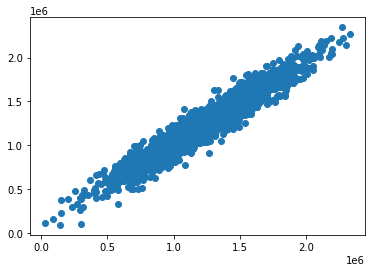

In [57]:
plt.scatter(y_test,pred)

C:\Users\OLAYINKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


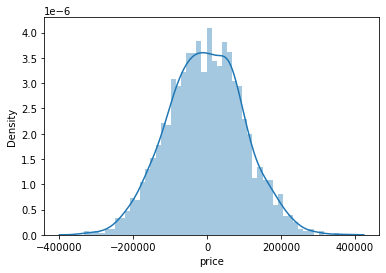

In [58]:
sns.distplot((y_test- pred), bins=50);

### Regression Evaluation Metrics
Here are 3 common evaluation metrics for regression problems:

<b>Mean Absolute Error</b> (MAE) is the mean of the absolute value of the errors

<b>Mean Squared error</b> (MSE) is the mean of the squared errors:

<b>Root Mean Square Error</b> (RMSE) is the square root of the mean of the squared errors:

In [59]:
from sklearn import metrics

In [60]:
print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test, pred)))

MAE:  82288.22250721788
MSE:  10460958905.7747
RMSE:  286.85923814166745


In [61]:
metrics.explained_variance_score(y_test,pred)

0.9178179926278648